In [80]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
from pathlib import Path
import csv
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Get ticker list
tickers_path = "Resources/tickers_list/tickers_list.csv"
with open(tickers_path) as csvfile:
    data = csv.reader(csvfile)
    next(data)
    tickers_list = [row[0] for row in data]

### Display Summary of filtered stocks (Maybe make a new df for easy scanning)

# Display tickers
print("List of the tickers")
print(tickers_list)

# Display summaries like cumulative return, closing price, volume, etc

# Display fundamentals like P/E ratio

# Combine all Dataframe

### We can delete some of the print statement from app.py after completing this part (Marked with #D)

List of the tickers
['ENPH', 'SEDG', 'CMG', 'VRTX', 'BMY', 'WRB']


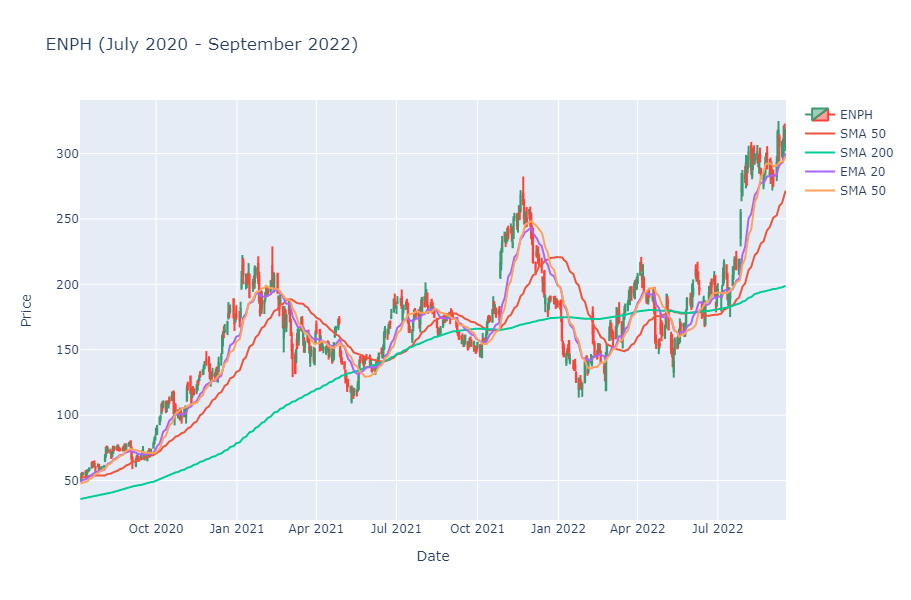

None

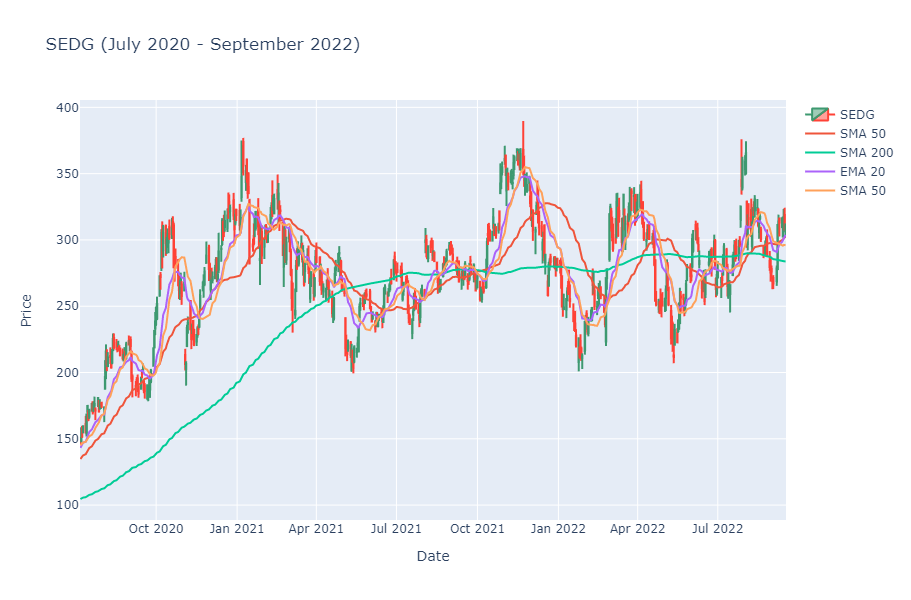

None

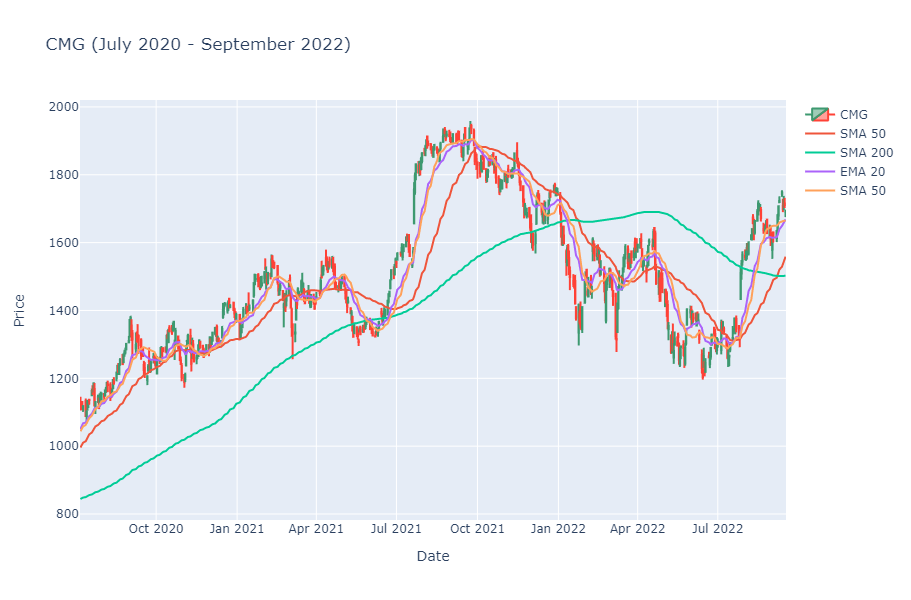

None

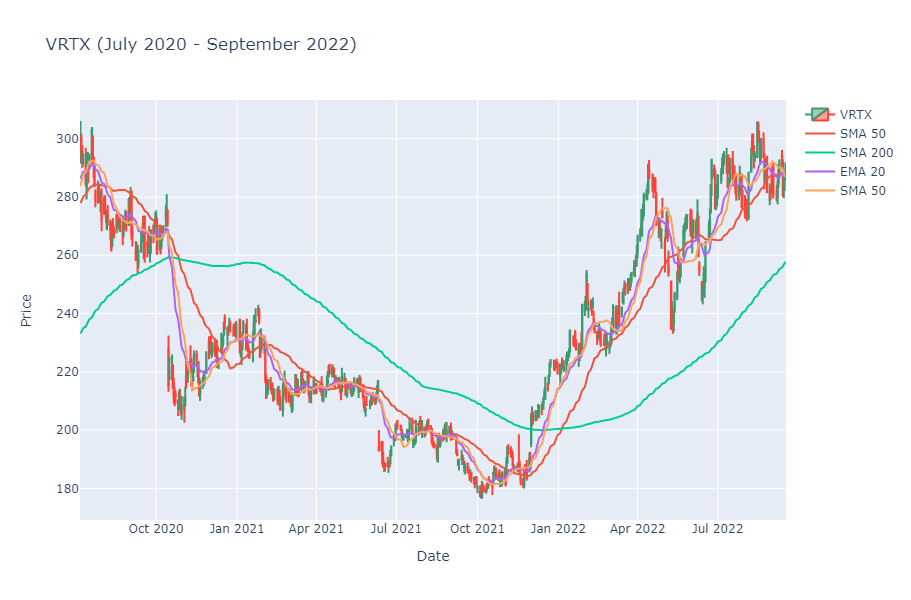

None

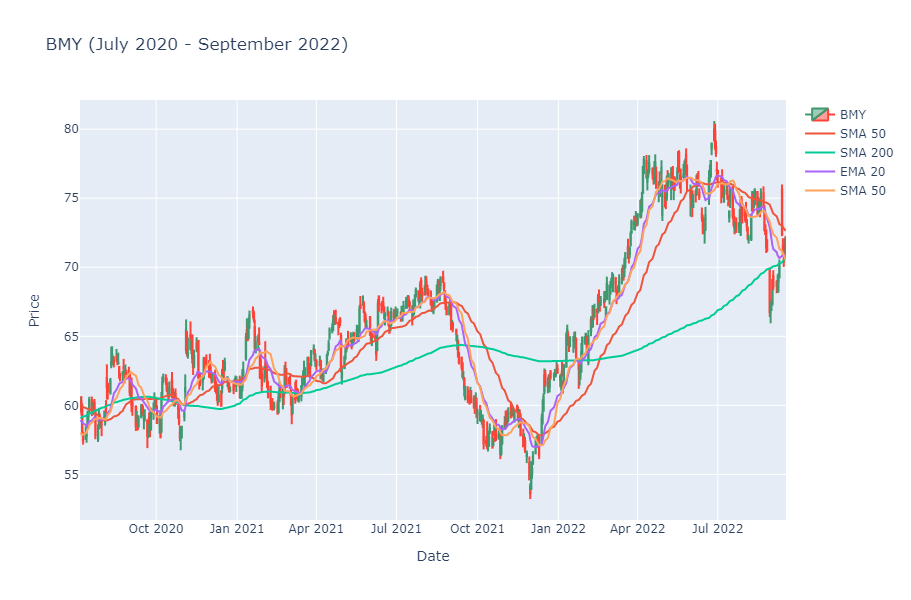

None

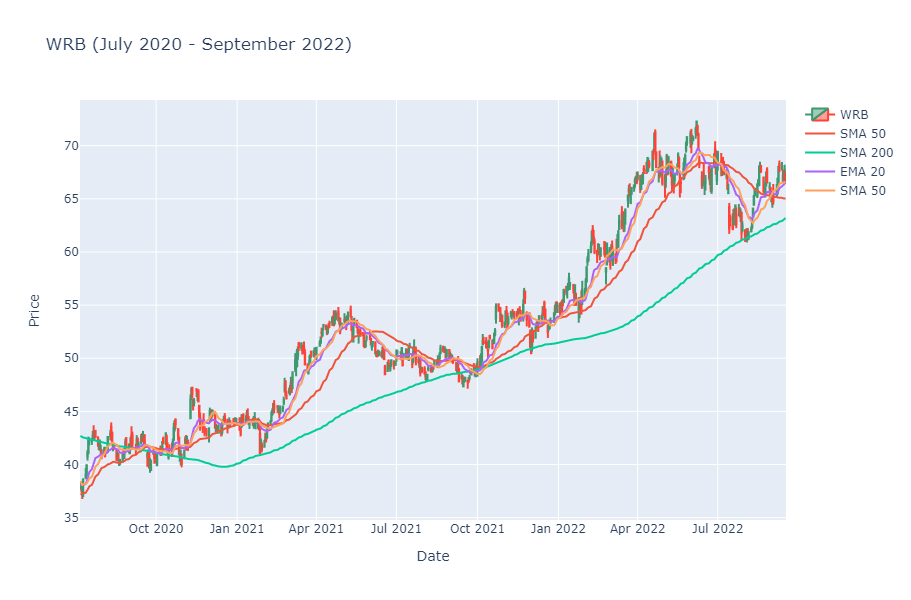

None

In [128]:
# If time allows
# Create function to display candlestick
for ticker in tickers_list:
    csvpath = f"Resources/{ticker}.csv"
    df = pd.read_csv(csvpath, index_col=0, infer_datetime_format=True, parse_dates=True).dropna()
    df = df.reset_index()

    fig = go.Figure(
        layout_title_text=ticker + ' (July 2020 - September 2022)'
    )
    
    fig.add_trace(
        go.Candlestick(
                x=df['index'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name=ticker
        ))
    fig.add_trace(
        go.Scatter(
            x=df['index'],
            y=df['SMA 50'],
            mode='lines',
            name='SMA 50'
        )    
    )
    
    fig.add_trace(
        go.Scatter(
            x=df['index'],
            y=df['SMA 200'],
            mode='lines',
            name='SMA 200'
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df['index'],
            y=df['EMA 20'],
            mode='lines',
            name='EMA 20'
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df['index'],
            y=df['SMA 20'],
            mode='lines',
            name='SMA 50'
        )
    )
    
    fig.update_layout(xaxis_rangeslider_visible=False, xaxis_title ='Date', yaxis_title='Price', width=900, height=600)
    display(fig.show())

In [108]:
# Create Plot for each stocks in the Resources folder
for ticker in tickers_list:
    csvpath = f"Resources/{ticker}.csv"
    df = pd.read_csv(csvpath, index_col=0, infer_datetime_format=True, parse_dates=True).dropna()
    
    tickers_name = f"{ticker} \nTechnical Indicators"

    # Create variables for each plot
    sma50_plot = df['SMA 50'].hvplot.line()
    sma200_plot = df['SMA 200'].hvplot.line()
    ema20_plot = df['EMA 20'].hvplot.line()
    sma20_plot = df['SMA 20'].hvplot.line()
    rsi_plot = df['RSI'].hvplot.line(height = 150)
    price_plot = df['close'].hvplot.line(color='black')

    # Overlay Plots
    final_plot = (
        (sma200_plot * sma50_plot * ema20_plot * sma20_plot * price_plot).opts(title=tickers_name, height=500, legend_position='bottom_right') 
        +
        (rsi_plot * hv.HLine(50).opts(color='red', line_dash='dashed'))
    ).cols(1)
    display(final_plot)

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]

:Layout
   .Overlay.I   :Overlay
      .Curve.SMA_200 :Curve   [index]   (SMA 200)
      .Curve.SMA_50  :Curve   [index]   (SMA 50)
      .Curve.EMA_20  :Curve   [index]   (EMA 20)
      .Curve.SMA_20  :Curve   [index]   (SMA 20)
      .Curve.Close   :Curve   [index]   (close)
   .Overlay.RSI :Overlay
      .Curve.RSI :Curve   [index]   (RSI)
      .HLine.I   :HLine   [x,y]